In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.09.29']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
948,Afghanistan,22.09.29,199067
1908,Africa,22.09.29,12356643
2856,Albania,22.09.29,332173
3804,Algeria,22.09.29,270668
4746,Andorra,22.09.29,46227
...,...,...,...
216368,Wallis and Futuna,22.09.29,761
217351,World,22.09.29,617166778
218254,Yemen,22.09.29,11935
219180,Zambia,22.09.29,333531


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
948,Afghanistan,22.09.29,199067
2856,Albania,22.09.29,332173
3804,Algeria,22.09.29,270668
4746,Andorra,22.09.29,46227
5670,Angola,22.09.29,103131
...,...,...,...
215657,Vietnam,22.09.29,11477886
216368,Wallis and Futuna,22.09.29,761
218254,Yemen,22.09.29,11935
219180,Zambia,22.09.29,333531


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
208459,United States,22.09.29,96346995
91368,India,22.09.29,44587307
70204,France,22.09.29,35405188
28282,Brazil,22.09.29,34654190
74916,Germany,22.09.29,33312373
184890,South Korea,22.09.29,24769101
207477,United Kingdom,22.09.29,23672856
98973,Italy,22.09.29,22432803
100888,Japan,22.09.29,21147468
164379,Russia,22.09.29,20648073


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
201855,Turkey,22.09.29,16873793
186770,Spain,22.09.29,13412263
150403,Oceania,22.09.29,12394495
215657,Vietnam,22.09.29,11477886
12381,Australia,22.09.29,10238422
...,...,...,...
216368,Wallis and Futuna,22.09.29,761
93276,International,22.09.29,721
213746,Vatican,22.09.29,29
203664,Tuvalu,22.09.29,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.09.29', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_15300\3734107174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.09.29', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.09.29,96346995
India,22.09.29,44587307
France,22.09.29,35405188
Brazil,22.09.29,34654190
Germany,22.09.29,33312373
South Korea,22.09.29,24769101
United Kingdom,22.09.29,23672856
Italy,22.09.29,22432803
Japan,22.09.29,21147468


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.09.29,96346995
1,India,22.09.29,44587307
2,France,22.09.29,35405188
3,Brazil,22.09.29,34654190
4,Germany,22.09.29,33312373
5,South Korea,22.09.29,24769101
6,United Kingdom,22.09.29,23672856
7,Italy,22.09.29,22432803
8,Japan,22.09.29,21147468
9,Russia,22.09.29,20648073


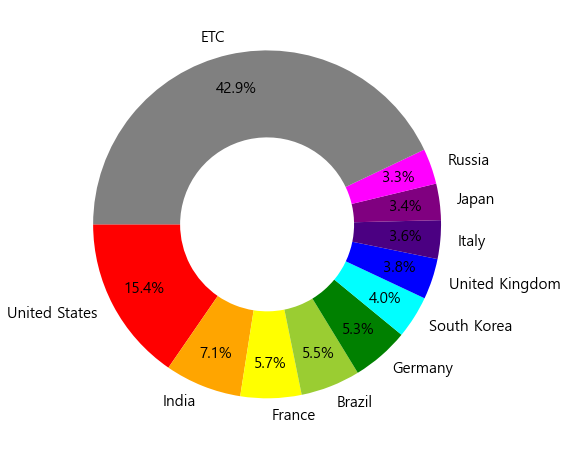

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()